In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Data Collection & Pre-Processing

In [4]:
calories_data = pd.read_csv("E:\Besant Tech\classes\Data Science\dataset\C_calories.csv")
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise_data = pd.read_csv("E:\Besant Tech\classes\Data Science\dataset\C_exercise.csv")
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
data = pd.concat([exercise_data,calories_data['Calories']],axis=1)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
data.shape

(15000, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Data Analysis

In [10]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
sns.set()

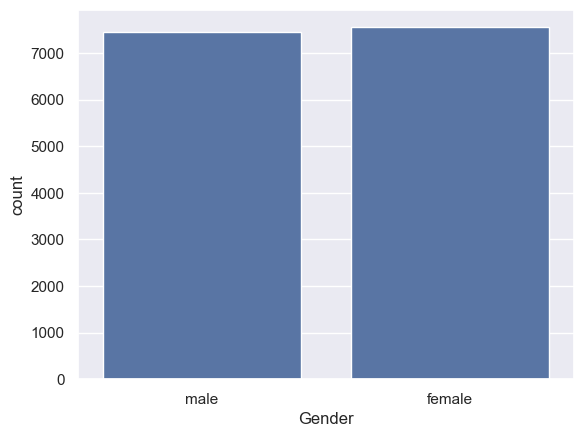

In [12]:
sns.countplot(x = 'Gender',data = data)
plt.show()

In [13]:
data.Gender.value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [14]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_6072\3912879420.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age)


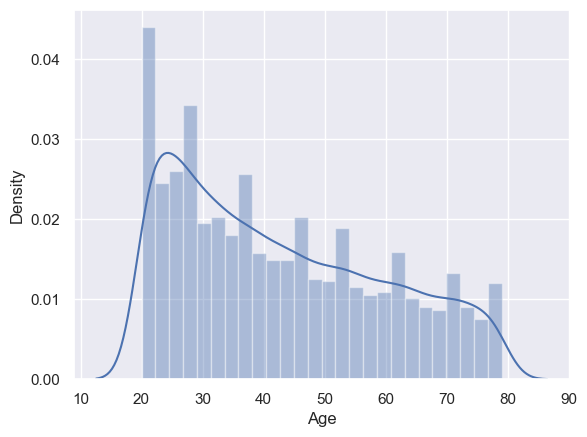

In [15]:
sns.distplot(data.Age)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6072\1019327807.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Height)


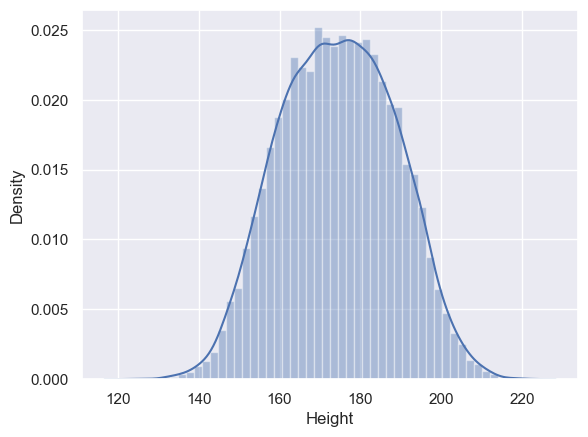

In [16]:
sns.distplot(data.Height)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6072\3908180292.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Weight)


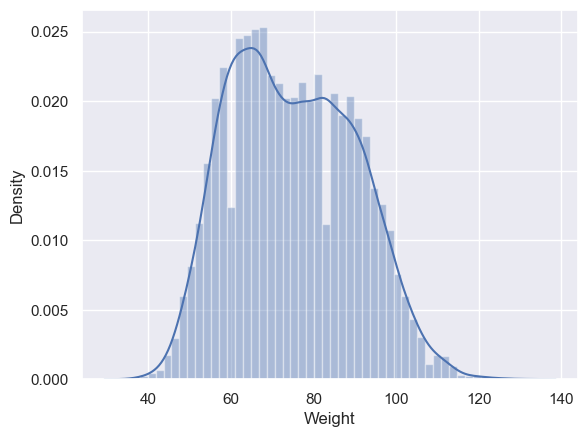

In [19]:
sns.distplot(data.Weight)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6072\1525970639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Duration)


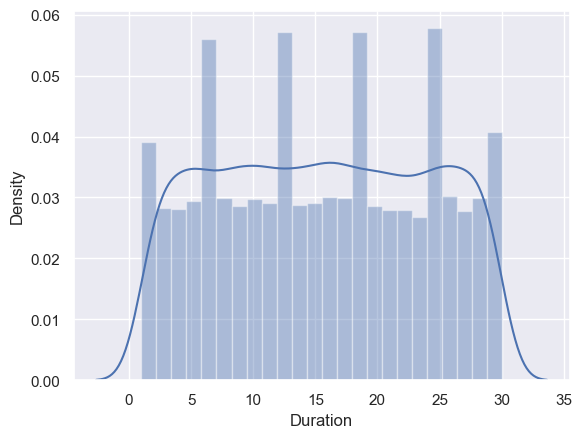

In [17]:
sns.distplot(data.Duration)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6072\1388198681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Heart_Rate)


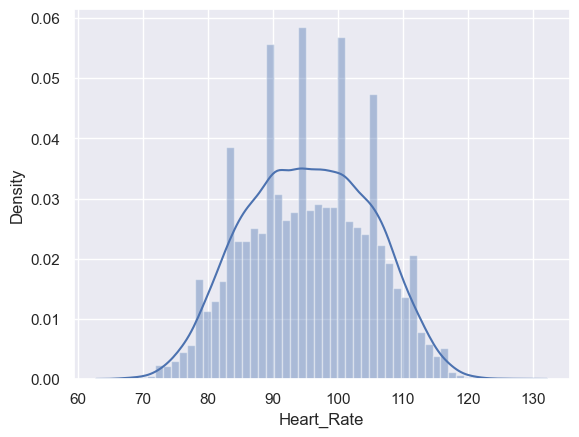

In [18]:
sns.distplot(data.Heart_Rate)
plt.show()

In [23]:
#data.replace({'Gender': {'M': 0, 'F': 1}},inplace=True)
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender']) 

In [24]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [25]:
correlation = data.corr()
correlation

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,-0.000687,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,-0.001827,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


In [27]:
data.corr()['Calories'].sort_values(ascending=False)

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64

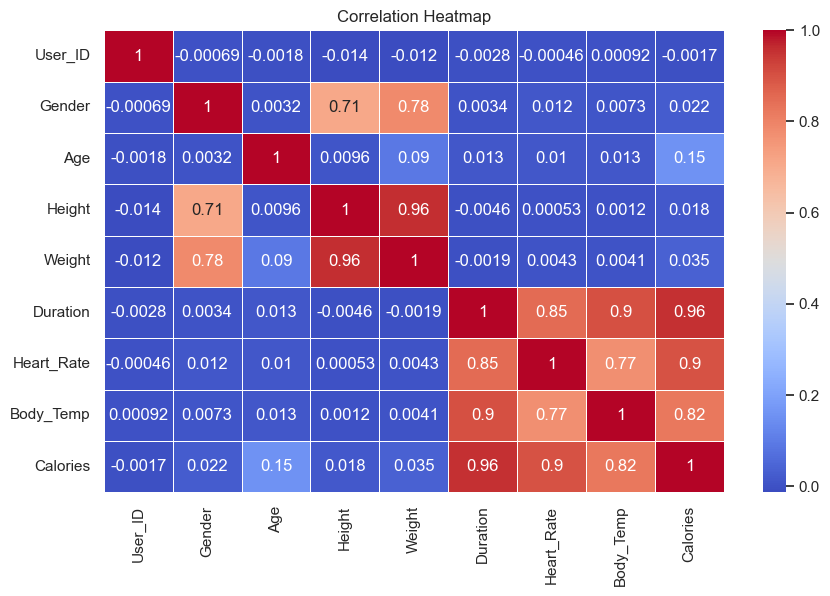

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
X = data.drop(['User_ID','Calories'],axis=1)
Y = data.Calories

## implemented crossvalidation just to compare the accuracy of the models

In [30]:
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.001),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=200, random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
]

In [31]:
def compare_models_crossVal():

    for model in models:
        cv_score = cross_val_score(model,X,Y,cv=5)
        
        cv_score_avg = sum(cv_score)/len(cv_score)
        cv_score_avg = cv_score_avg *100
        cv_score_avg = round(cv_score_avg,2)

        print("Accuracy is:", model,"=", cv_score)
        print("Accuracy % of model is:",cv_score_avg)

In [32]:
compare_models_crossVal()

Accuracy is: LinearRegression() = [0.96712832 0.96658977 0.96769213 0.96828562 0.96606908]
Accuracy % of model is: 96.72
Accuracy is: Ridge() = [0.96712785 0.96658938 0.9676925  0.96828546 0.96606977]
Accuracy % of model is: 96.72
Accuracy is: Lasso(alpha=0.001) = [0.96712776 0.96658907 0.96769224 0.96828591 0.96606991]
Accuracy % of model is: 96.72
Accuracy is: DecisionTreeRegressor(random_state=42) = [0.99328676 0.99235318 0.99296535 0.99270173 0.99316176]
Accuracy % of model is: 99.29
Accuracy is: RandomForestRegressor(n_estimators=200, random_state=42) = [0.99812829 0.99800377 0.99803521 0.9977341  0.99804585]
Accuracy % of model is: 99.8
Accuracy is: GradientBoostingRegressor(random_state=42) = [0.99652279 0.99660994 0.9966538  0.99645172 0.99626042]
Accuracy % of model is: 99.65
Accuracy is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=

In [33]:
#optimized function
def compare_models_crossVal(models, X, Y):

    for model in models:
        cv_scores = cross_val_score(model, X, Y, cv=5)

        cv_avg = round(cv_scores.mean() * 100, 2)

        print("="*60)
        print(f"Model: {model.__class__.__name__}")
        print("Cross-Validation Scores:", np.round(cv_scores, 4))
        print(f"Average Accuracy: {cv_avg}%")


In [34]:
compare_models_crossVal(models, X, Y)

Model: LinearRegression
Cross-Validation Scores: [0.9671 0.9666 0.9677 0.9683 0.9661]
Average Accuracy: 96.72%
Model: Ridge
Cross-Validation Scores: [0.9671 0.9666 0.9677 0.9683 0.9661]
Average Accuracy: 96.72%
Model: Lasso
Cross-Validation Scores: [0.9671 0.9666 0.9677 0.9683 0.9661]
Average Accuracy: 96.72%
Model: DecisionTreeRegressor
Cross-Validation Scores: [0.9933 0.9924 0.993  0.9927 0.9932]
Average Accuracy: 99.29%
Model: RandomForestRegressor
Cross-Validation Scores: [0.9981 0.998  0.998  0.9977 0.998 ]
Average Accuracy: 99.8%
Model: GradientBoostingRegressor
Cross-Validation Scores: [0.9965 0.9966 0.9967 0.9965 0.9963]
Average Accuracy: 99.65%
Model: XGBRegressor
Cross-Validation Scores: [0.9991 0.9992 0.9993 0.9992 0.9991]
Average Accuracy: 99.92%


In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [37]:
model = XGBRegressor()

In [38]:
model.fit(X_train,Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [40]:
test_pred = model.predict(X_test)
print(test_pred)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [42]:
r2 = r2_score(Y_test, test_pred)
print("r-squared is :", r2)
mae = mean_absolute_error(Y_test, test_pred)
print("mean_absolute_error is :", mae)
rmse = np.sqrt(mean_squared_error(Y_test, test_pred))
print("rmse is :", rmse)

r-squared is : 0.998800624504713
mean_absolute_error is : 1.4833678883314132
rmse is : 2.1704170134933394
